# Project: No-show- Appointments
<br>  
<div>
<img src="https://s3.amazonaws.com/cms.ipressroom.com/296/files/20208/5f6397462cfac24d7eaf6945_GettyImages-698153858/GettyImages-698153858_25e461d3-fdf1-4f39-ad96-74e4969115c6-prv.jpg" width="400"/>   
</div>


#  I. Introduction 
## Dataset Overview



This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

Some of the features included in this dataset:
+ `ScheduledDay` indicates the day someone called or registered the appointment.
+ `AppointmentDay` indicates the day of the appointment, when the patient have to visit the doctor.
+ `Neighbourhood` indicates the location of the hospital, where the appointment takes place.
+ `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program, Bolsa Família.
+ `SMS_received` 1 or more messages sent to the patient.
+ `No-show` has Yes and No values, `Yes` if the patient did not show up, and `No` if the patient showed up to the appointment.

\
The original dataset is from [kaggle's](https://www.kaggle.com/joniarroba/noshowappointments)

 ## Outlines

The rest of this report will focus on applying the data analysis process on the dataset under investigation. The data analysis process consists of five main steps as follows:
1. **Questions:** Defining questions based on the dataset to direct the analysis
2. **Wrangle:** Assessing the data to define the problems, then cleaning the dataset
3. **Explore:** Finding patterns and relationships in the data
4. **Draw Conclusions:** With descriptive statistics and visualizations
5. **Communicate:** Which is reporting the findings in this Jupyter notebook


# II. Data Analysis Process

# 1. Questions

+ **Q1:** Are women more likely to show up than men?
+ **Q2:** What `Age` group has the highest `No-show` percentage? (e.g. cut 100 years into 4 quarters!)
+ **Q3:** Which features have a direct correlation with the `No-show`?
+ **Q4:** Out of the group of patients who recieved an sms, what is the percentage of the `No-show`?
+ **Q5:** Is the period between the `ScheduledDay` and the `AppointmentDay` affect the `No-show`? Find a number to describe that...
+ **Q6:** Which `Neighbourhood` has the higest `No-show` and which has the lowest?

In [1]:
# import libraries and load datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load dataset
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


# 2. Wrangle
## a. Assessing

In [2]:
# check the dtypes, shape, number of nulls of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
# quick statistical summary about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# check if there are any duplicated rows
df.duplicated().sum()

0

### Assessing Conclusion: 
+ There are no features have nulls
+ There are no duplicated rows
+ `PatientId` and `AppointmentID` columns are irrelevant to to the investigation. They are just like the index of the dataset. So they will be dropped from the dataframe.
+ Column names are in the uppercase form, we need to change it to the lowercase, and add underscore before the second capital letter in the same column name. e.g. rename `ScheduledDay` to `scheduled_day`  
+ `No-show` change column name to `No_show`
+ `ScheduledDay` and `AppointmentDay` columns data types need to be changed to `datetime` 
+ `ScheduledDay` and `AppointmentDay`columns have T and Z before and after the time, we need to define if it is going to raise an issue and how to handle it. 


## b. Cleaning

+ drop `PatientId` and `AppointmentID` columns

In [5]:
df.drop(columns=["PatientId", "AppointmentID"], inplace=True)
# check to confirm last step
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


+ Separate any two word column name such as "ScheduledDay" by an underscore 
+ Change column names to lower case 

In [6]:
# separate any two word column name such as "ScheduledDay" by underscore "_"
import re

df.columns = ["_".join(re.findall('[A-Z][^A-Z]*', cname)) 
              for cname in df.columns]

# change column names to lowercase
df.columns = df.columns.str.lower()

# check to confirm last step 
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,s_m_s_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now, `s_m_s_received` column name has multiple underscores and is not comprehensible.

In [7]:
df.rename(columns={"s_m_s_received": "sms_received"}, inplace=True)
# check to confirm last step 
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


+ Rename `No-show` column to `no_show`

In [8]:
df.rename(columns={"no-show": "no_show"}, inplace=True)

# check to confirm last step 
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


+ Change `scheduled_day` and `appointment_day` dtypes to `datetime` 

In [9]:
df["scheduled_day"] = pd.to_datetime(df["scheduled_day"])
df["appointment_day"] = pd.to_datetime(df["appointment_day"])

In [10]:
# check to confirm last step 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   neighbourhood    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   hipertension     110527 non-null  int64              
 7   diabetes         110527 non-null  int64              
 8   alcoholism       110527 non-null  int64              
 9   handcap          110527 non-null  int64              
 10  sms_received     110527 non-null  int64              
 11  no_show          110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

### Cleaning Step after Exploring

After exploring I found it hard to work/visualize with `gender` and `no_show` columns as they are categorical variables. Since each one of them has only `2` unique values. I will apply ordinal encoding on them.   

In [11]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [12]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# for the gender column, creat a new column to hold the new ordinal variable
# while keeping the old categorical varible

gender_mapper = {"M":1, "F":0,}
df["gender_ordinal"] = df["gender"].replace(gender_mapper)


# for the no_show column
no_show_mapper = {"Yes":1, "No":0,}
df["no_show_ordinal"] = df["no_show"].replace(no_show_mapper)

df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,gender_ordinal,no_show_ordinal
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0


In [14]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,gender_ordinal,no_show_ordinal
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.350023,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.476979,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


## Functions Definitions

In [15]:
# defining a function for plotting two histograms 
def two_hist(f1, f2, f1_label, f2_label, x_label, y_label):
    """
    Plotting two histograms of two dataframe columns on the same figure
    
    Arg:
        f1 - first dataframe column
        f2- second dataframe column
        f1_label - label of the first histogram
        f2_label - label of the second histogram
        x_label - x-axis label
        y_label - y-axis label
        
    Returns:
        Histogram figure
    """
    
    f1.hist(alpha=0.5, label=f1_label);
    f2.hist(alpha=0.5, label=f2_label);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.legend();
    
    
    # defining a function for plotting a bar plot
def bar_plot(heights, title, x_label, y_label, labels):
    """
    Plotting two histograms of two dataframe columns on the same figure
    
    Arg:
        heights - bar plot heights
        title - figure title
        x_label - x-axis label
        y_label - y-axis label
        labels- xticks labels
        
    Returns:
        Bar figure
    """
    
    locations = np.arange(len(heights))
    plt.bar(locations, heights)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);
    plt.xticks(locations,labels)

# 3. Explore 

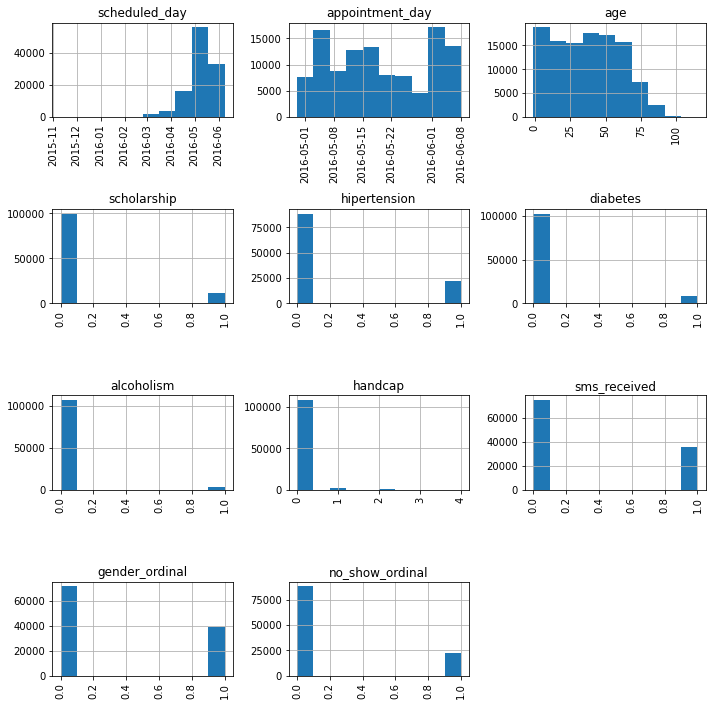

In [16]:
hist = df.hist(figsize=(10,10), xrot=90)
plt.tight_layout() # adjust spacing between subplots to minimize the overlaps.

<AxesSubplot:xlabel='age', ylabel='no_show'>

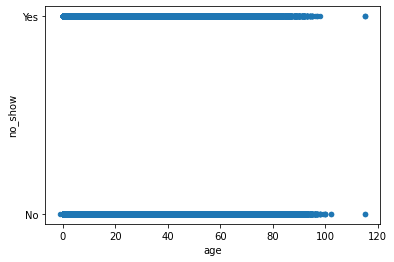

In [17]:
df.plot(kind="scatter", x="age", y="no_show")

In [18]:
# create masks for the no_show
no_show_mask = df.no_show_ordinal == 1
show_mask = df.no_show_ordinal == 0

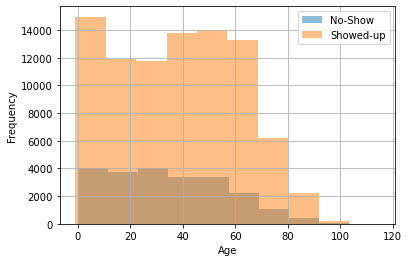

In [19]:
f1, f2, f1_label, f2_label, x_label, y_label = (df.age[no_show_mask], df.age[show_mask],
                                                "No-Show","Showed-up", "Age", "Frequency")

two_hist(f1, f2, f1_label, f2_label, x_label, y_label)

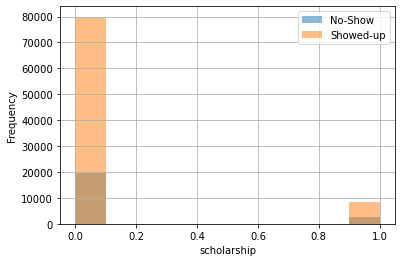

In [20]:
f1, f2, f1_label, f2_label, x_label, y_label= (df.scholarship[no_show_mask], df.scholarship[show_mask],
                                               "No-Show","Showed-up", "scholarship", "Frequency")

two_hist(f1, f2, f1_label, f2_label, x_label, y_label)

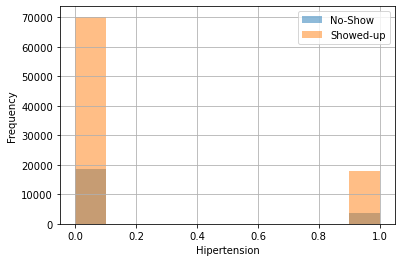

In [21]:
f1, f2, f1_label, f2_label, x_label, y_label= (df.hipertension[no_show_mask], df.hipertension[show_mask],
                                               "No-Show","Showed-up", "Hipertension", "Frequency")

two_hist(f1, f2, f1_label, f2_label, x_label, y_label)

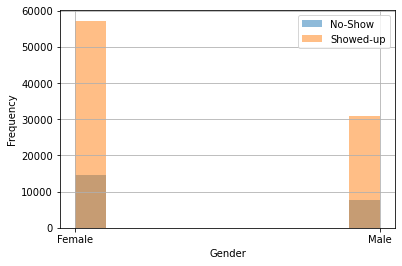

In [22]:
f1, f2, f1_label, f2_label, x_label, y_label= (df.gender_ordinal[no_show_mask], df.gender_ordinal[show_mask],
                                               "No-Show","Showed-up", "Gender", "Frequency")

two_hist(f1, f2, f1_label, f2_label, x_label, y_label)
locations = [0, 1]
labels = ["Female", "Male"]
plt.xticks(locations,labels);

# 4. Draw Conclusion

### Answering Q1
+ **Q1:** Are women more likely to show up than men?

In [23]:
gender_group_c = df.groupby("gender")["no_show_ordinal"].mean()
gender_group_c 

gender
F    0.203146
M    0.199679
Name: no_show_ordinal, dtype: float64

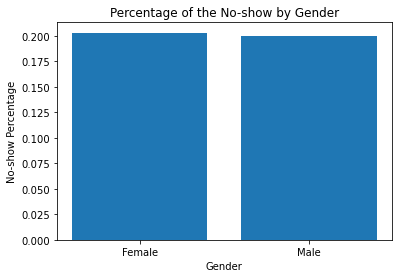

In [24]:
heights = gender_group_c
title = "Percentage of the No-show by Gender"
x_label, y_label = "Gender", "No-show Percentage"
labels = ["Female", "Male"]

bar_plot(heights, title, x_label, y_label, labels)

There is a slight difference between the percentage of women and men that do not show up to their scheduled appointments. 
+ 20.31% of Women do not show up
+ 19.97% of Men do not show up

### Answering Q2
**Q2:** What `Age` group has the highest `No-show` percentage? (e.g. cut 100 years into 4 quarters!)

In [25]:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [26]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 18, 37, 55, 115]

# Labels for the four acidity level groups
bin_names = ["Junior", "Adult", "Mature", "Senior"]

# Creates acidity_levels column
df["age_stages"] = pd.cut(df["age"], bins=bin_edges, labels=bin_names)

df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,gender_ordinal,no_show_ordinal,age_stages
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,Senior
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,Senior
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,Senior
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,Junior
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,Senior


In [27]:
age_group = df.groupby("age_stages")["no_show_ordinal"].mean()
age_group

age_stages
Junior    0.219878
Adult     0.235376
Mature    0.195310
Senior    0.156450
Name: no_show_ordinal, dtype: float64

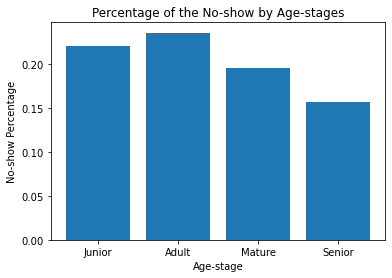

In [28]:
heights = age_group
title = "Percentage of the No-show by Age-stages"
x_label, y_label = "Age-stage", "No-show Percentage"
labels = heights.index

bar_plot(heights, title, x_label, y_label, labels)

**Seniors** (> 55 years old) have the lowest no show percentage, which means that People at senior age are more likely to show up to their appointments

**Adults** (18-37 years old) have the highest no show percentage

#### Age-stages and Gender

In [29]:
gender_age = df.groupby(["gender","age_stages"])["no_show_ordinal"].mean()
gender_age

gender  age_stages
F       Junior        0.221345
        Adult         0.235496
        Mature        0.196552
        Senior        0.160515
M       Junior        0.218301
        Adult         0.235057
        Mature        0.192573
        Senior        0.148016
Name: no_show_ordinal, dtype: float64

In [30]:
women_age = gender_age['F']
men_age = gender_age['M']

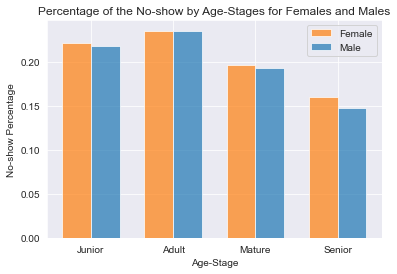

In [31]:
sns.set_style('darkgrid')

ind = np.arange(len(women_age))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
women_bars = plt.bar(ind, women_age, width, color='tab:orange', alpha=.7, label='Female')
men_bars = plt.bar(ind + width, men_age, width, color='tab:blue', alpha=.7, label='Male')

# title and labels
plt.ylabel('No-show Percentage')
plt.xlabel('Age-Stage')
plt.title('Percentage of the No-show by Age-Stages for Females and Males')
locations = ind + width / 2  # xtick locations
labels = women_age.index  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()
plt.show()

sns.set_style('white') # to return to the old figure style with white backgroud 
# for the rest of the code

Still the gender does not give us a solid interpretation. 
However, male `Seniors` (> 55 years old) seem to have a better `No-show` percentage than female `Seniors`, `14.80%` and `16.05%`, respectively.

### Answering Q3
**Q3:** Which features have a direct correlation with the `No-show`?
+ scholarship
+ hipertension 
+ diabetes	
+ alcoholism
+ handcap	

**Scholarship** effect on **No-show**

In [32]:
df.groupby("scholarship")["no_show_ordinal"].mean()

scholarship
0    0.198072
1    0.237363
Name: no_show_ordinal, dtype: float64

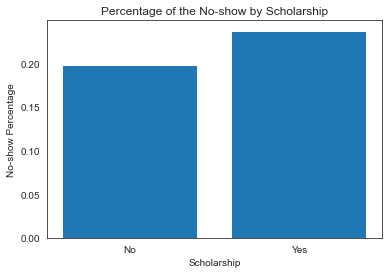

In [33]:
heights = df.groupby("scholarship")["no_show_ordinal"].mean()
title = "Percentage of the No-show by Scholarship"
x_label, y_label = "Scholarship", "No-show Percentage"
labels = ["No", "Yes"]

bar_plot(heights, title, x_label, y_label, labels)

People who are not part of the scholarship more likely to show up.
+ `19.8%` of the people who are not part of the scholarship do not show up to their appointments
+ `23.74%` of the people who are part of the scholarship do not show up to their appointments

**Hipertension** effect on **No-show**

In [34]:
df.groupby("hipertension")["no_show_ordinal"].mean()

hipertension
0    0.209037
1    0.173020
Name: no_show_ordinal, dtype: float64

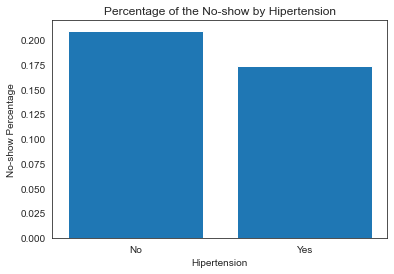

In [35]:
heights = df.groupby("hipertension")["no_show_ordinal"].mean()
title = "Percentage of the No-show by Hipertension"
x_label, y_label = "Hipertension", "No-show Percentage"
labels = ["No", "Yes"]

bar_plot(heights, title, x_label, y_label, labels)

People that have hipertension more likely to show up.
+ `17.30%` of the people that have hipertenion, do not show up to their appointments
+ `20.90%` of the people that do not have hipertenion, do not show up to their appointments

**Diabetes** effect on **No-show**

In [36]:
df.groupby("diabetes")["no_show_ordinal"].mean()

diabetes
0    0.203628
1    0.180033
Name: no_show_ordinal, dtype: float64

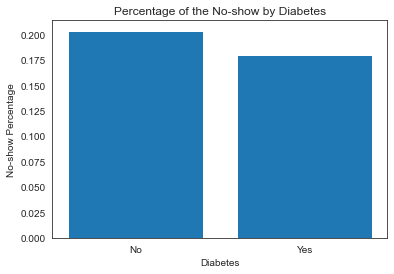

In [37]:
heights = df.groupby("diabetes")["no_show_ordinal"].mean()
title = "Percentage of the No-show by Diabetes"
x_label, y_label = "Diabetes", "No-show Percentage"
labels = ["No", "Yes"]

bar_plot(heights, title, x_label, y_label, labels)

People that have diabetes more likely to show up.
+ `18.00%` of the people that have diabetes, do not show up to their appointments
+ `20.36%` of the people that do not have diabetes, do not show up to their appointments

Combination of **Diabetes** and **Hipertension** effect on **No-show**

In [38]:
df.groupby(["diabetes", "hipertension"])["no_show_ordinal"].mean()

diabetes  hipertension
0         0               0.209215
          1               0.171792
1         0               0.198353
          1               0.175917
Name: no_show_ordinal, dtype: float64

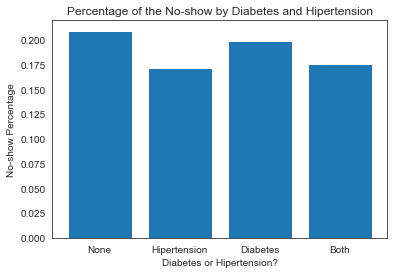

In [39]:
heights = df.groupby(["diabetes", "hipertension"])["no_show_ordinal"].mean()
title = "Percentage of the No-show by Diabetes and Hipertension"
x_label, y_label = "Diabetes or Hipertension?", "No-show Percentage"
labels = ["None", "Hipertension", "Diabetes", "Both"]

bar_plot(heights, title, x_label, y_label, labels)

People that have hipertension only and both more likely to show up.
+ `17.18%` of the people that have hipertension only , do not show up to their appointments
+ `17.95%` of the people that do not have both hipertension and diabetes, do not show up to their appointments

**Alcoholism** effect on **No-show**

In [40]:
df.groupby("alcoholism")["no_show_ordinal"].mean()

alcoholism
0    0.201946
1    0.201488
Name: no_show_ordinal, dtype: float64

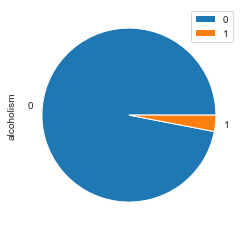

In [41]:
df.alcoholism.value_counts().plot(kind="pie")
plt.legend();

In [42]:
df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

Alcoholism does not have a noticiable effect on the no show 

**Handcap** effect on **No-show**

In [43]:
df.groupby("handcap")["no_show_ordinal"].mean()

handcap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: no_show_ordinal, dtype: float64

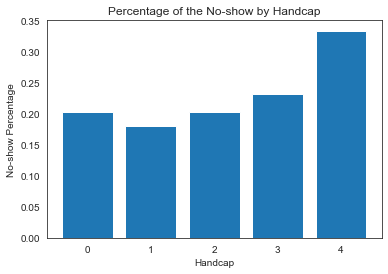

In [44]:
heights = df.groupby("handcap")["no_show_ordinal"].mean()
title = "Percentage of the No-show by Handcap"
x_label, y_label = "Handcap", "No-show Percentage"
labels = heights.index

bar_plot(heights, title, x_label, y_label, labels)

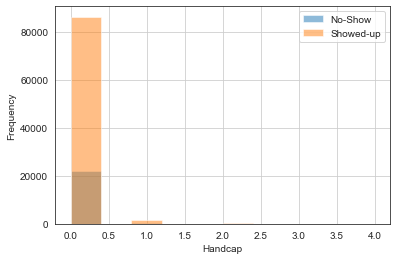

In [45]:
f1, f2, f1_label, f2_label, x_label, y_label= (df.handcap[no_show_mask], df.handcap[show_mask],
                                               "No-Show","Showed-up", "Handcap", "Frequency")

two_hist(f1, f2, f1_label, f2_label, x_label, y_label)

Increasing the number of Handcap above one increases the `No-show` percentage.\
But the majority (almost all of them) of people have zero handcap and `20.24` of them do not show up to their appointment.\
So the Handcap feature does not have effect on the No-show

### Answering Q4
**Q4:** Out of the group of patients who recieved an sms, what is the percentage of the `No-show`?

In [46]:
df.groupby("sms_received")["no_show_ordinal"].mean()

sms_received
0    0.167033
1    0.275745
Name: no_show_ordinal, dtype: float64

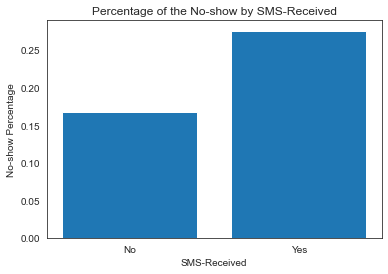

In [47]:
heights = df.groupby("sms_received")["no_show_ordinal"].mean()
title = "Percentage of the No-show by SMS-Received"
x_label, y_label = "SMS-Received", "No-show Percentage"
labels = ["No", "Yes"]

bar_plot(heights, title, x_label, y_label, labels)

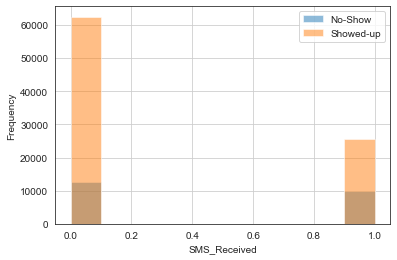

In [48]:
f1, f2, f1_label, f2_label, x_label, y_label= (df.sms_received[no_show_mask], df.sms_received[show_mask],
                                               "No-Show","Showed-up", "SMS_Received", "Frequency")

two_hist(f1, f2, f1_label, f2_label, x_label, y_label)

+ `16.70%` of the patients that did not receive an SMS did not show up.
+ `27.57%`of the patients that received an SMS did not show up.\
That is odd! It does not make sense. But maybe that is because the majority of people did not receive an SMS

### Answering Q5
**Q5:** Is the period between the `ScheduledDay` and the `AppointmentDay` affect the `No-show`? Find a number to describe that...

In [49]:
df["awaiting_period"] = df["appointment_day"] - df["scheduled_day"]
# df["awaiting_period"] = df["scheduled_day"] - df["appointment_day"]

df["awaiting_days"] = df["awaiting_period"].dt.days
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,gender_ordinal,no_show_ordinal,age_stages,awaiting_period,awaiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,Senior,-1 days +05:21:52,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,Senior,-1 days +07:51:33,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,Senior,-1 days +07:40:56,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,Junior,-1 days +06:30:29,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,Senior,-1 days +07:52:37,-1


In [50]:
df["awaiting_days"].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: awaiting_days, dtype: float64

<AxesSubplot:>

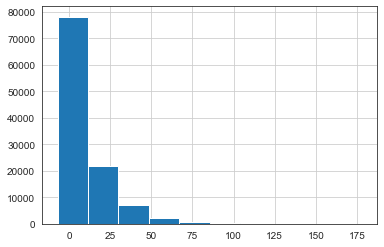

In [51]:
df["awaiting_days"].hist()

In [52]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [np.NINF, -1.0001, -0.00001,  0.9, 7, 14, 30, 178]

# Labels for the four acidity level groups
bin_names = ["Negative days", "Negative one", "Zero days", "Less than a week", "1-2 weeks", "2 weeks - 1 month", "More than a Month"]

# Creates acidity_levels column
df["awaiting_stages"] = pd.cut(df["awaiting_days"], bins=bin_edges, labels=bin_names)

df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,gender_ordinal,no_show_ordinal,age_stages,awaiting_period,awaiting_days,awaiting_stages
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,Senior,-1 days +05:21:52,-1,Negative one
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,Senior,-1 days +07:51:33,-1,Negative one
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,Senior,-1 days +07:40:56,-1,Negative one
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,Junior,-1 days +06:30:29,-1,Negative one
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,Senior,-1 days +07:52:37,-1,Negative one


In [53]:
df.groupby("awaiting_stages")["no_show_ordinal"].mean()

awaiting_stages
Negative days        1.000000
Negative one         0.046469
Zero days            0.213505
Less than a week     0.250102
1-2 weeks            0.312254
2 weeks - 1 month    0.325212
More than a Month    0.330208
Name: no_show_ordinal, dtype: float64

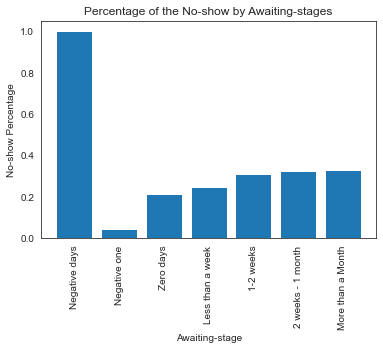

In [54]:
heights = df.groupby("awaiting_stages")["no_show_ordinal"].mean()
title = "Percentage of the No-show by Awaiting-stages"
x_label, y_label = "Awaiting-stage", "No-show Percentage"
labels = heights.index

bar_plot(heights, title, x_label, y_label, labels)
plt.xticks(rotation=90);

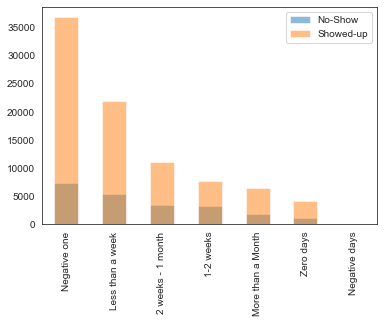

In [55]:
df.awaiting_stages[no_show_mask].value_counts().plot(kind='bar', alpha=0.5, label="No-Show", color='tab:blue');
df.awaiting_stages[show_mask].value_counts().plot(kind='bar', alpha=0.5, label="Showed-up", color='tab:orange');
plt.legend();

Increasing the period between the appointment day and the registration day (scheduled day) increases the no show percentage.

However, I do not hava an explanation for the negative values of the awaiting period. Maybe it means that the patient came without an appointment! But if that is true, the No-show for the negative days should be zero.

### Answering Q6
**Q6:** Which `Neighbourhood` has the higest `No-show` and which has the lowest?

In [56]:
neighbourhood_group = df.groupby("neighbourhood")["no_show_ordinal"]
neighbourhood_group.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
AEROPORTO,8.0,0.125000,0.353553,0.0,0.0,0.0,0.0,1.0
ANDORINHAS,2262.0,0.230327,0.421135,0.0,0.0,0.0,0.0,1.0
ANTÔNIO HONÓRIO,271.0,0.184502,0.388611,0.0,0.0,0.0,0.0,1.0
ARIOVALDO FAVALESSA,282.0,0.219858,0.414887,0.0,0.0,0.0,0.0,1.0
BARRO VERMELHO,423.0,0.215130,0.411399,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
SÃO JOSÉ,1977.0,0.216490,0.411956,0.0,0.0,0.0,0.0,1.0
SÃO PEDRO,2448.0,0.210376,0.407659,0.0,0.0,0.0,0.0,1.0
TABUAZEIRO,3132.0,0.182950,0.386687,0.0,0.0,0.0,0.0,1.0


In [57]:
# neighbourhood with the highest no-show
neighbourhood_group.mean().idxmax()

'ILHAS OCEÂNICAS DE TRINDADE'

In [58]:
# neighbourhood with the lowest no-show
neighbourhood_group.mean().idxmin()

'PARQUE INDUSTRIAL'

In [59]:
# the most frequent neighbourhood
df.neighbourhood.value_counts().idxmax()

'JARDIM CAMBURI'

In [60]:
# the no show percentage for the most frequent neighbourhood
df.query('neighbourhood == "JARDIM CAMBURI"')["no_show_ordinal"].mean()

0.18984061163664637

In [61]:
# the lowest frequent neighbourhood
df.neighbourhood.value_counts().idxmin()

'PARQUE INDUSTRIAL'

In [62]:
# the no show percentage for the lowest frequent neighbourhood
df.query('neighbourhood == "PARQUE INDUSTRIAL"')["no_show_ordinal"].mean()

0.0

In [63]:
neighbourhood_group_mean=df.groupby("neighbourhood")["no_show_ordinal"].mean()
neighbourhood_group_mean.describe()

count    81.000000
mean      0.205427
std       0.097230
min       0.000000
25%       0.179907
50%       0.197588
75%       0.217454
max       1.000000
Name: no_show_ordinal, dtype: float64

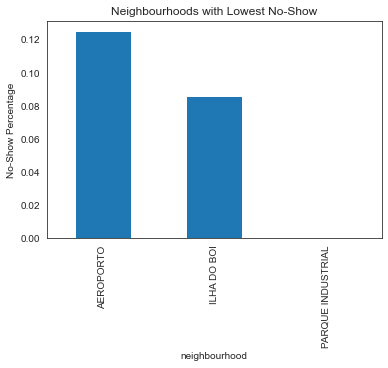

In [64]:
neighbourhood_group_mean.where(neighbourhood_group_mean<0.13).dropna().plot(kind="bar",
                                                                            title="Neighbourhoods with Lowest No-Show");
plt.ylabel("No-Show Percentage");                                                                          

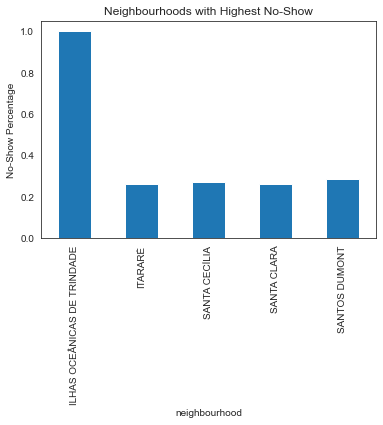

In [65]:
neighbourhood_group_mean.where(neighbourhood_group_mean>0.25).dropna().plot(kind="bar",
                                                                            title="Neighbourhoods with Highest No-Show");
plt.ylabel("No-Show Percentage");                                                                        

+ The `Neighbourhood` with the highest `No-show` is `ILHAS OCEÂNICAS DE TRINDADE`
+ The `Neighbourhood` with the lowest `No-show` is `PARQUE INDUSTRIAL`
+ The most frequent `Neighbourhood` is `JARDIM CAMBURI` and has a `No-show` percentage of `18.98%`
+ The lowest frequent `Neighbourhood` is `PARQUE INDUSTRIAL` and has a `No-show` percentage of `0%`


# III. Conclusion 

## Summary 

So to answer the main question that the analysis focuses on, What factors are important to predict if a patient will show up for their scheduled appointment?, the features that have a direct correlation with the No-show:

1. Age:\
    **Seniors** (> 55 years old) have the lowest no show percentage and **Adults** (18-37 years old) have the highest no show percentage

2. Age and Gender:\
    Male **Seniors** (> 55 years old) seem to have a better `No-show` percentage than female **Seniors**, `14.80%` and `16.05%`, respectively.

3. Scholarship:\
    People who are not part of the scholarship more likely to show up. Where the `No-show` percentage for the patients without and with scholarship are `19.8%` and `23.74%`, respectively.

4. Hipertension:\
    People that have hipertension more likely to show up. Where the `No-show` percentage for the patients with and without Hipertension `17.30%` and `20.90%`, respectively.
    
5. Diabetes:\
    Negative correlation between Diabetes and the `No-show`. Where the `No-show` percentage for the patients with and without Diabetes `18.00%` and `20.36%`, respectively.

6. Diabetes and Hipertension:\
    People that have hipertension only and both Diabetes and Hipertension more likely to show up. `17.18%` of the people that have hipertension only , do not show up to their appointments. `17.95%` of the people that do not have both hipertension and diabetes, do not show up to their appointments.

8. Awaiting Period:\
    Increasing the period between the appointment day and the registration day (scheduled day) increases the no show percentage.

9. Neighbourhood:
    + The `Neighbourhood` with the highest `No-show` is `ILHAS OCEÂNICAS DE TRINDADE`
    + The `Neighbourhood` with the lowest `No-show` is `PARQUE INDUSTRIAL`

    

While the features that do not have a direct/noticible effect of the No-show:
1. Gender\
    There is a slight difference between the percentage of women and men that do not show up to their scheduled appointments.

2. Alcoholism:\
    The `No-show` percentage for the patients whether they are alcoholics or not equals to `20%`

3. Handcap:\
    Increasing the number of Handcap above one increases the `No-show` percentage. But the majority (almost all of them) of people have zero handcap and `20.24` of them do not show up to their appointment. So the Handcap feature does not have effect on the No-show.

## Limitations
1. SMS_received:\
    There is a positive correlation but it should be a negative correlation.
    + `16.70%` of the patients that did not receive an SMS did not show up.
    + `27.57%`of the patients that received an SMS did not show up.\
    It does not make sense. But maybe that is because the majority of people did not receive an SMS


2. Awaiting Period:\
    Increasing the period between the appointment day and the registration day (scheduled day) increases the no show percentage.

    However, I do not hava an explanation for the negative values of the awaiting period. Maybe it means that the patient came without an appointment! But if that is true, the No-show for the negative days should be zero.

## Research Suggestions

+ Having a column for the severity of patient's case. For example having a scale from 1 - 5. In most of the cases, patients with a sever case will show up to their appointments. 
+ Having a column for the distance between the patient's address and the hospital/clinic's address. As the distance decreases the `No-show` probably will decrease.  